<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithday_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rain_data211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172151.csv',encoding='cp949')
rain_data101 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172202.csv',encoding='cp949')
rain_data100 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172215.csv',encoding='cp949')
rain_data212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172236.csv',encoding='cp949')
rain_data90 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172245.csv',encoding='cp949')

In [4]:
# rain_data = pd.merge(rain_data211, rain_data101, how='outer')
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data211, rain_data101, rain_data100, rain_data212, rain_data90])

In [5]:
print(rain_data)

              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         NaN         NaN         NaN         NaN        NaN
1     2009-01-02         NaN         NaN         NaN         NaN        NaN
2     2009-01-03         NaN         NaN         NaN         NaN        NaN
3     2009-01-04         NaN         NaN         NaN         NaN        NaN
4     2009-01-05         NaN         NaN         NaN         NaN        NaN
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         NaN         NaN         NaN         NaN        NaN
5474  2023-12-28         NaN         NaN         NaN         NaN        NaN
5475  2023-12-29         NaN         NaN         NaN         NaN        NaN
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [13]:
rain_col = [i for i in rain_data.columns if '강수' in i]
rain_data[rain_col] = rain_data[rain_col].fillna(0)
print(rain_col)

['211강수량(mm)', '101강수량(mm)', '100강수량(mm)', '212강수량(mm)', '90강수량(mm)']


In [25]:
rain = []

for i in range(0,len(rain_data)):
  r_data = 0
  for col in rain_col:
    if '211' in col :
      r_data += rain_data[col][i]*0.668
    elif '101' in col:
      r_data += rain_data[col][i] * 0.124
    elif '100' in col:
      r_data += rain_data[col][i] * 0.114
    elif '90' in col:
      r_data += rain_data[col][i] * 0.094
  rain.append(r_data)

print(rain)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5664, 0.0, 0.5834000000000001, 0.0, 0.0, 0.0, 0.012400000000000001, 0.0, 0.0724, 0.2082, 0.0342, 0.0, 0.0, 0.0, 3.0309999999999997, 2.5796, 0.0, 0.0, 0.3874, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.049600000000000005, 1.7386000000000001, 18.901, 0.0, 0.2166, 0.0, 0.0, 0.0, 0.0352, 0.16760000000000003, 0.0, 0.0, 1.4314, 0.38360000000000005, 0.6972, 0.0, 0.0, 0.0, 0.235, 1.3922, 0.5388000000000001, 0.0, 3.0470000000000006, 0.2906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4188, 20.564400000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 4.901400000000001, 0.0228, 0.405, 12.95, 1.5133999999999999, 0.0, 0.0352, 10.462, 0.0, 0.188, 1.2364, 1.6254, 10.534600000000001, 0.16780000000000003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2488, 9.107, 0.532, 0.0, 0.0, 0.0342, 33.625, 4.2459999999999996, 0.0, 0.0, 9.004000000000001, 9.967, 0.339, 0.681, 0.42540000000000006, 0.0, 0.0, 0.0, 1.1478, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2746

In [26]:
rain_data['rain'] = rain

In [27]:
print(rain_data.isna().sum().sum())
print(rain_data)

0
              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)  \
0     2009-01-01         0.0         0.0         0.0         0.0        0.0   
1     2009-01-02         0.0         0.0         0.0         0.0        0.0   
2     2009-01-03         0.0         0.0         0.0         0.0        0.0   
3     2009-01-04         0.0         0.0         0.0         0.0        0.0   
4     2009-01-05         0.0         0.0         0.0         0.0        0.0   
...          ...         ...         ...         ...         ...        ...   
5473  2023-12-27         0.0         0.0         0.0         0.0        0.0   
5474  2023-12-28         0.0         0.0         0.0         0.0        0.0   
5475  2023-12-29         0.0         0.0         0.0         0.0        0.0   
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7   
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8   

        rain  
0     0.0000  
1     0.0000  
2   

In [28]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/only_dam_flow.csv',encoding='utf-8')

print(dam_flow)

              날짜  유입량(㎥/s)
0     2009-01-01     0.000
1     2009-01-02     0.825
2     2009-01-03     3.904
3     2009-01-04     0.000
4     2009-01-05     0.000
...          ...       ...
5473  2023-12-27    25.873
5474  2023-12-28    21.186
5475  2023-12-29    20.887
5476  2023-12-30    29.183
5477  2023-12-31    25.803

[5478 rows x 2 columns]


In [29]:
data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data, dam_flow])

In [30]:
rain_col = [i for i in rain_data.columns if '강수' in i]
data = data.drop(rain_col, axis = 1)

In [31]:
print(data)

              날짜    rain  유입량(㎥/s)
0     2009-01-01  0.0000     0.000
1     2009-01-02  0.0000     0.825
2     2009-01-03  0.0000     3.904
3     2009-01-04  0.0000     0.000
4     2009-01-05  0.0000     0.000
...          ...     ...       ...
5473  2023-12-27  0.0000    25.873
5474  2023-12-28  0.0000    21.186
5475  2023-12-29  0.0000    20.887
5476  2023-12-30  6.0980    29.183
5477  2023-12-31  5.9312    25.803

[5478 rows x 3 columns]


In [32]:
print(max(data['유입량(㎥/s)']))

3918.5


<Axes: xlabel='날짜'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


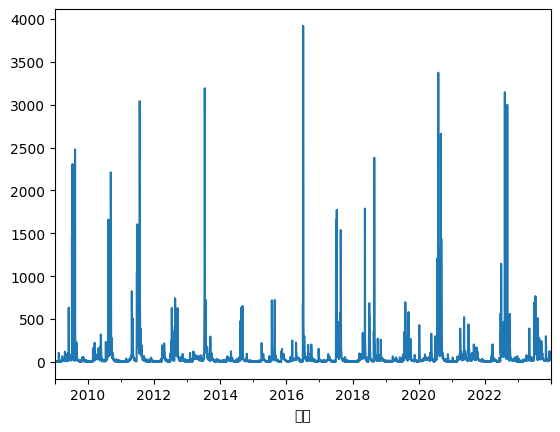

In [33]:
data.index = pd.to_datetime(data['날짜'])

dam_flow = data['유입량(㎥/s)']
dam_flow.plot()

In [35]:
data['Y'] = data['유입량(㎥/s)']
data = data.dropna()

train = data[data['날짜']<'2018-01-01']
valid = data[data['날짜']>='2018-01-01']
valid = valid[valid['날짜']<'2023-01-01']
test = data[data['날짜']>='2023-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['날짜', 'Y'], axis = 1), train['Y']
validX, validY = valid.drop(['날짜', 'Y'], axis = 1), valid['Y']
testX, testY = test.drop(['날짜', 'Y'], axis = 1), test['Y']

train set :  3287 
 valid set :  1826 
 test set :  365 



In [36]:
print(trainX)
len(trainX.columns)


              rain  유입량(㎥/s)
날짜                          
2009-01-01  0.0000     0.000
2009-01-02  0.0000     0.825
2009-01-03  0.0000     3.904
2009-01-04  0.0000     0.000
2009-01-05  0.0000     0.000
...            ...       ...
2017-12-27  0.0000     0.024
2017-12-28  0.0000     0.104
2017-12-29  0.0000     5.957
2017-12-30  0.4254     6.000
2017-12-31  0.8044     0.285

[3287 rows x 2 columns]


2

In [37]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((2, 1)))
model1.add(LSTM(64))
model1.add(Dense(40, 'relu'))
model1.add(Dense(40, 'relu'))
model1.add(Dense(8, 'relu'))
model1.add(Dense(8))
model1.add(Dense(1))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 40)                2600      
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 8)                 328       
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 21545 (84.16 KB)
Trainable params: 21545 (

In [38]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model1.fit(trainX, trainY, validation_data = (validX, validY), batch_size=10, epochs=50, callbacks=[cp1])

Epoch 1/50
329/329 [==============================] - 6s 13ms/step - loss: 45009.4219 - root_mean_squared_error: 212.1542 - val_loss: 48585.6289 - val_root_mean_squared_error: 220.4215
Epoch 2/50
329/329 [==============================] - 4s 11ms/step - loss: 42693.0000 - root_mean_squared_error: 206.6228 - val_loss: 43120.7422 - val_root_mean_squared_error: 207.6553
Epoch 3/50
329/329 [==============================] - 4s 12ms/step - loss: 37052.8555 - root_mean_squared_error: 192.4912 - val_loss: 37179.6250 - val_root_mean_squared_error: 192.8202
Epoch 4/50
329/329 [==============================] - 3s 10ms/step - loss: 31331.3496 - root_mean_squared_error: 177.0066 - val_loss: 31275.1855 - val_root_mean_squared_error: 176.8479
Epoch 5/50
329/329 [==============================] - 3s 10ms/step - loss: 25989.4180 - root_mean_squared_error: 161.2123 - val_loss: 26277.4980 - val_root_mean_squared_error: 162.1034
Epoch 6/50
329/329 [==============================] - 5s 15ms/step - loss: 

In [39]:
train_score = model1.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

12/12 [==============================] - 0s 1ms/step - loss: 103.2376 - root_mean_squared_error: 10.1606
Train Score: 103.24 MSE (10.16 RMSE)


In [40]:
train_predictions = model1.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

103/103 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
날짜,,
2009-01-01,0.255774,0.000
2009-01-02,0.883350,0.825
2009-01-03,3.856699,3.904
2009-01-04,0.255774,0.000
2009-01-05,0.255774,0.000
...,...,...
2017-12-27,0.272654,0.024
2017-12-28,0.329648,0.104
2017-12-29,6.104285,5.957


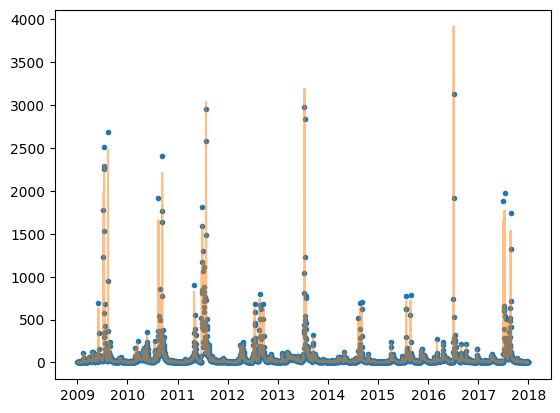

In [41]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:],'.')
plt.plot(train_results['Actuals'][:],alpha = 0.5)

In [42]:
val_predictions = model1.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

58/58 [==============================] - 0s 1ms/step


,Val Predictions,Actuals
날짜,,
2018-01-01,2.500775,2.703
2018-01-02,2.589380,2.793
2018-01-03,2.715220,2.894
2018-01-04,0.255774,0.000
2018-01-05,0.255774,0.000
...,...,...
2022-12-27,5.692022,5.607
2022-12-28,11.745996,10.891
2022-12-29,9.893064,9.218


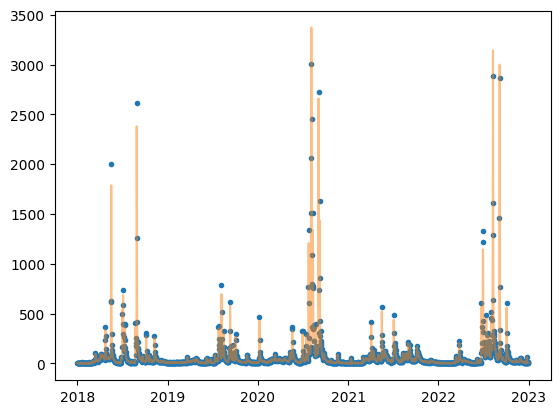

In [43]:
plt.plot(val_results['Val Predictions'][:],'.')
plt.plot(val_results['Actuals'][:], alpha = 0.5)


In [44]:
test_predictions = model1.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

12/12 [==============================] - 0s 1ms/step


,Test Predictions,Actuals
날짜,,
2023-01-01,7.552526,7.252
2023-01-02,5.554358,5.488
2023-01-03,3.532385,3.597
2023-01-04,4.191197,4.283
2023-01-05,1.809735,1.909
...,...,...
2023-12-27,26.727221,25.873
2023-12-28,21.712912,21.186
2023-12-29,21.385296,20.887


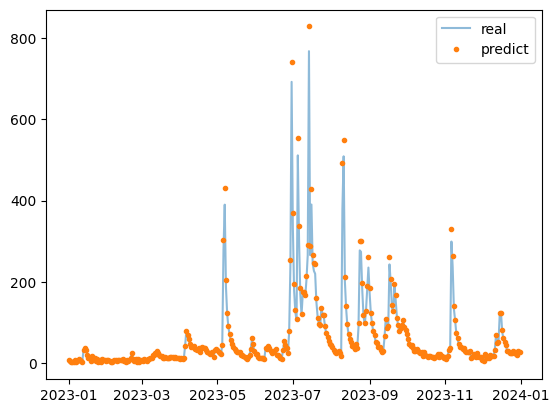

In [45]:
plt.plot(test_results['Actuals'][:],alpha =0.5)
plt.plot(test_results['Test Predictions'][:],'.')
plt.legend(['real', 'predict'])

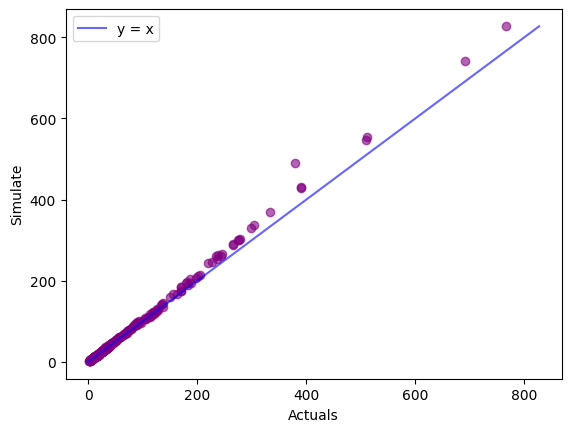

In [47]:
x = np.arange(0,max(test_results['Test Predictions'][:]))
y = x
plt.scatter(test_results['Actuals'][:], test_results['Test Predictions'][:], color = 'purple', alpha = 0.6)
plt.plot(x,y, color = 'blue', alpha = 0.6, label = 'y = x')
plt.xlabel('Actuals')
plt.ylabel('Simulate')

plt.legend()
plt.show()

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(testY, test_predictions))
rsquared_score = r2_score(testY, test_predictions)
print('R^2 Score : %f' %(rsquared_score))
print('RMSE : %.2f' %(rmse))

R^2 Score : 0.987424
RMSE : 10.16


In [49]:
# NSE
from numpy import mean
num_sum1 = 0
num_sum2 = 0
num_avg = mean(test_results['Actuals'][:])
for i in range(len(test_results)):
  num1 = test_results['Actuals'][i] - test_results['Test Predictions'][i]
  num_sum1 += num1**2
  num2 = test_results['Actuals'][i] - num_avg
  num_sum2 += num2**2

nse = 1 - (num_sum1 / num_sum2)
print('NSE : %f' %nse)

NSE : 0.987424


In [50]:
# PBIAS
num_sum1 = 0
for i in range(len(test_results)):
  num1 = test_results['Actuals'][i] - test_results['Test Predictions'][i]
  num_sum1 += num1

pbias = (num_sum1 / np.sum(test_results['Actuals'][:])) * 100
print('PBIAS : %f' %pbias)

PBIAS : -5.719161


In [51]:
#R^2
import math

num_sum1 = 0
num_sum2 = 0
num_sum3 = 0
act_avg = mean(test_results['Actuals'][:])
pred_avg = mean(test_results['Test Predictions'][:])
for i in range(len(test_results)):
  num1 = (test_results['Actuals'][i] - act_avg) * (test_results['Test Predictions'][i] - pred_avg)
  num_sum1 += num1
  num2 = test_results['Actuals'][i] - pred_avg
  num_sum2 += num2**2
  num3 = test_results['Test Predictions'][i] - pred_avg
  num_sum3 += num3**2

r_square = (num_sum1 / (math.sqrt(num_sum2)* math.sqrt(num_sum3)))**2
print('R Square : %f' %r_square)

R Square : 0.996138
